In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

# Import LogoMaker
import logomaker

%matplotlib inline
plt.ion()

In [2]:
# Load splice site sequences and counts
df_GT = pd.read_excel('human_splice_sites.xlsx',parse_cols=[0,1]).dropna()
df_GC = pd.read_excel('human_splice_sites.xlsx',parse_cols=[6,7]).dropna()
seq_list = list(df_GT.iloc[:,1]) + list(df_GC.iloc[:,1])
counts_list = list(df_GT.iloc[:,0]) + list(df_GC.iloc[:,0])

In [5]:
# Create counts_mat
counts_mat = logomaker.load_alignment(sequences=seq_list, 
                                      sequence_counts=counts_list, 
                                      characters='ACGT', 
                                      positions=[-3,-2,-1,1,2,3,4,5,6])
counts_mat.head()

,A,C,G,T
pos,,,,
-3,65712.0,69955.0,37508.0,29589.0
-2,126104.0,22507.0,25802.0,28351.0
-1,25829.0,6317.0,153710.0,16908.0
1,0.0,0.0,202764.0,0.0
2,0.0,2633.0,0.0,200131.0


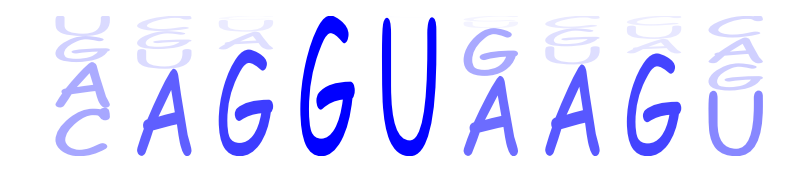

In [6]:
# Make all logo types
logo = logomaker.make_logo(counts_mat, logo_type='probability', 
                           characters=logomaker.to_RNA,
                          font_family='fantasy',
                          use_transparency=True,
                          colors='blue',
                          stack_order='small_on_top',
                          axes_style='naked',
                          hpad=.5)

# Draw logos
fig, ax = plt.subplots(figsize=[8,2])
logo.draw(ax)

fig.tight_layout()